# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Irfan Nur Fahrudin
- **Email:** irfan.nurfahrudin@gmail.com
- **ID Dicoding:** inurart

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda per jam berdasarkan musim ?
- Bagaimana pola penggunaan sepeda per jam berdasarkan hari kerja ?

## Import Semua Packages/Library yang Digunakan

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [109]:
#mengambil data .csv
hour_df = pd.read_csv('/content/data/hour.csv')

#menampilkan sebagian data dibaris awal
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Memastikan file CSV sudah diunggah di direktori /content/data/
- Melihat beberapa data

### Assessing Data

In [110]:
# Cek info dataframe
hour_df.info()

# Cek statistik deskriptif
hour_df.describe()

# Cek missing value
print(hour_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
instant       0
dteday        0
season        0
y

**Insight:**
- .info() untuk mengidentifikasi tipe data
- .describe() untuk mengidentifikasi persebaran data.
- .isnull().sum() untuk mendeteksi apakah ada kolom missing values. Pada data tersebut tidak terdapat missing value.

### Cleaning Data

In [111]:
# rename nama kolom
hour_df.rename(columns={'instant':'rec_id',
                   'dteday':'datetime',
                   'holiday':'is_holiday',
                   'workingday':'is_workingday',
                   'weathersit':'weather_condition',
                   'hum':'humidity',
                   'mnth':'month',
                   'cnt':'total_count',
                   'hr':'hour',
                   'yr':'year'},inplace=True)

# konversi ke format waktu
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

# Mengubah Kolom Kategori ke Tipe category
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

In [112]:
# Cek info dataframe
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rec_id             17379 non-null  int64         
 1   datetime           17379 non-null  datetime64[ns]
 2   season             17379 non-null  category      
 3   year               17379 non-null  category      
 4   month              17379 non-null  category      
 5   hour               17379 non-null  category      
 6   is_holiday         17379 non-null  category      
 7   weekday            17379 non-null  category      
 8   is_workingday      17379 non-null  category      
 9   weather_condition  17379 non-null  category      
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

**Insight:**
- Rename nama kolom : Dengan mengganti nama kolom menjadi lebih deskriptif, analisis dan interpretasi data menjadi lebih mudah.
- Mengkonversi ke format waktu(datetime) : memudahkan analisis berbasis waktu, seperti tren harian, musiman, atau korelasi dengan faktor lainnya.
- Kategori membantu dalam analisis statistik dan visualisasi (misalnya, seaborn akan otomatis memahami hubungan kategori).

## Exploratory Data Analysis (EDA)

### Explore ...

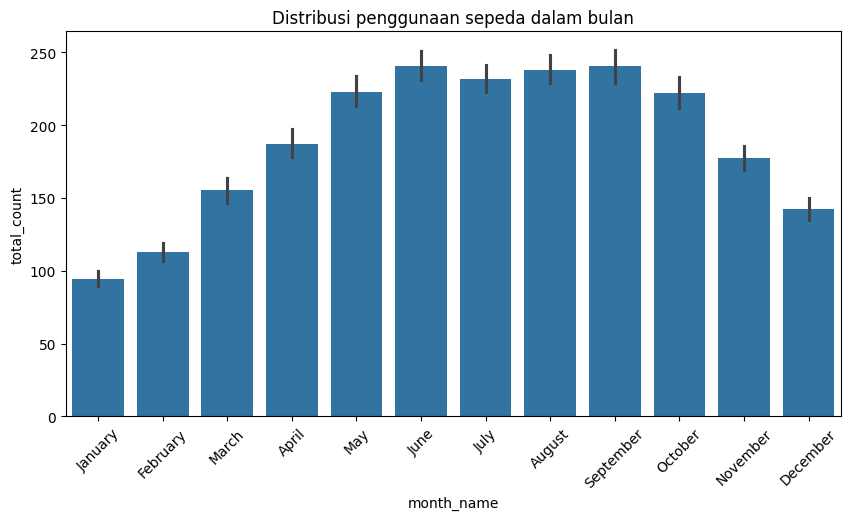

In [119]:
import calendar
hour_df["month"] = hour_df["month"].astype(int)
hour_df["month_name"] = hour_df["month"].apply(lambda x: calendar.month_name[x])

# Membuat plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=hour_df, x="month_name", y="total_count", order=calendar.month_name[1:])
ax.set(title="Distribusi penggunaan sepeda dalam bulan")
plt.xticks(rotation=45)  # Putar label agar lebih terbaca
plt.show()

<Axes: >

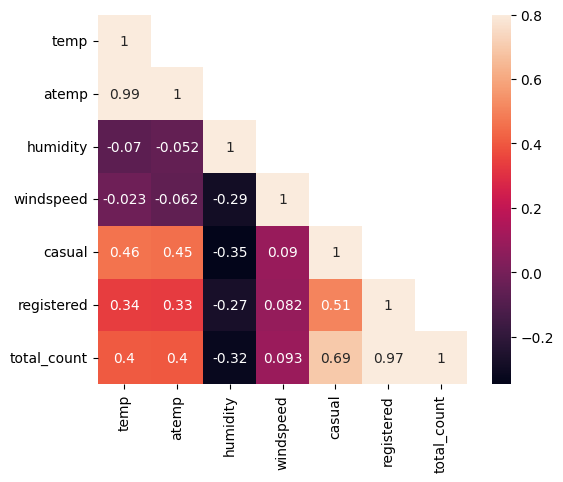

In [115]:
# korelasi
corrMatt = hour_df[["temp","atemp",
"humidity","windspeed",
"casual","registered",
"total_count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

sns.heatmap(corrMatt,
            mask=mask,
vmax=.8, square=True,annot=True)

**Insight:**
- Bulan Juni-September merupakan bulan dengan jumlah penumpang tertinggi. Sepertinya Musim Gugur adalah musim yang baik untuk bersepeda.
- Kedua variabel *registered* and *casual*, menunjukkan korelasi kuat yang jelas terhadap *total_count*.
Demikian pula *temp* dan *atemp* menunjukkan korelasi yang tinggi. *wind_speed* dan *humidity* mempunyai korelasi yang sedikit negatif.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

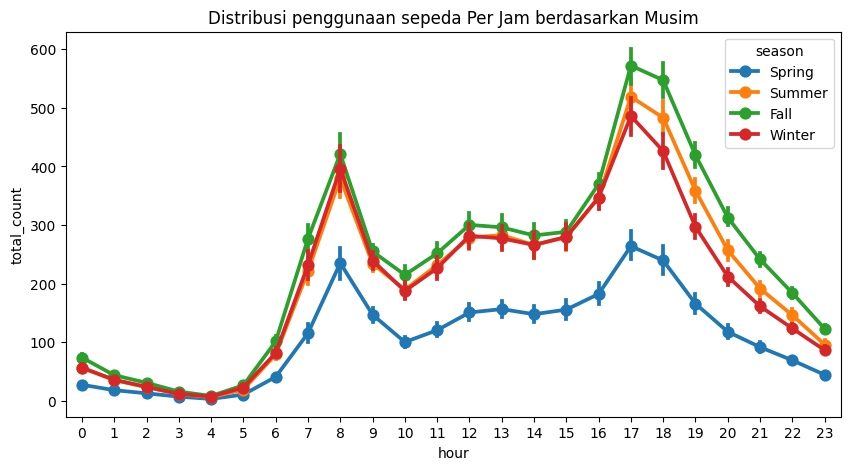

In [116]:
hour_df["season"] = hour_df["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})

# Membuat plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.pointplot(data=hour_df, x='hour', y='total_count', hue='season', ax=ax)
ax.set(title="Distribusi penggunaan sepeda Per Jam berdasarkan Musim")
plt.show()

### Pertanyaan 2:

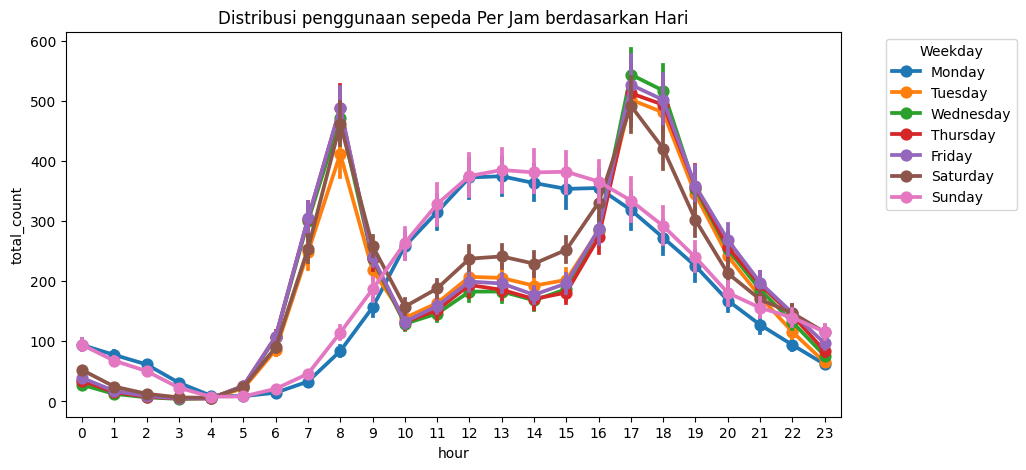

In [117]:
hour_df["weekday"] = hour_df["weekday"].astype(int)

weekday_mapping = {i: calendar.day_name[i] for i in range(7)}
hour_df["weekday"] = hour_df["weekday"].map(weekday_mapping)

# Membuat plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.pointplot(data=hour_df, x='hour', y='total_count', hue='weekday', ax=ax, hue_order=list(calendar.day_name))
ax.set(title="Distribusi penggunaan sepeda Per Jam berdasarkan Hari")
plt.legend(title="Weekday", bbox_to_anchor=(1.05, 1), loc='upper left')  # Pindahkan legend agar lebih rapi
plt.show()


**Insight:**

Dari histogram tersebut dapat disimpulkan bahwa pola penggunaan sepeda bervariasi berdasarkan musim dan hari dalam seminggu.

- Berdasarkan musim, penggunaan sepeda mengalami dua puncak utama pada pagi (07:00-09:00) dan sore (17:00-19:00). Musim panas dan gugur memiliki jumlah penyewaan tertinggi, sedangkan musim dingin memiliki jumlah terendah, kemungkinan karena faktor cuaca yang kurang mendukung.
- Berdasarkan hari kerja, penggunaan sepeda pada hari Senin-Jumat menunjukkan pola yang jelas, dengan lonjakan signifikan di pagi dan sore hari, menandakan sepeda banyak digunakan sebagai transportasi kerja atau sekolah. Sebaliknya, pada akhir pekan, penggunaan lebih merata sepanjang hari, yang mengindikasikan penggunaan lebih banyak untuk rekreasi.

## Analisis Lanjutan (Opsional)

## Conclusion

1.   Conclution pertanyaan 1


*     Pola penggunaan sepeda menunjukkan tren yang serupa di semua musim, dengan dua puncak pada jam pagi (07:00-09:00) dan sore (17:00-19:00).

*   Musim panas (Summer) dan musim gugur (Fall) memiliki penggunaan tertinggi, terutama pada sore hari.

*   Musim dingin (Winter) memiliki penggunaan terendah.


2.   Conclution pertanyaan 2



*   Pada hari kerja (Senin-Jumat), terdapat dua puncak penggunaan yang jelas di pagi hari (07:00-09:00) dan sore hari (17:00-19:00).
*   Pada akhir pekan (Sabtu & Minggu), pola penggunaan lebih merata sepanjang hari tanpa lonjakan signifikan di pagi atau sore hari.

